In [205]:
# Configurando o ambiente
import pandas as pd
import seaborn as sb
low_memory = False
%matplotlib inline
pd.options.display.max_columns = 80
pd.options.display.max_rows = 90

In [206]:
# Fonte: http://www.ssp.sp.gov.br/transparenciassp/
# abrindo os arquivos csv e jogando dentro de um vetor
dados = []
ano = 2013
indice = []
for i in range(6):
    dados.append(pd.read_csv('DadosIML/DadosIML_' + str(ano) + '.csv', delimiter = ';', encoding='latin-1'))
    indice.append(ano)
    ano = ano + 1

In [255]:
# Concatenando os arquivos em um só
df = pd.concat(dados, ignore_index = True)
#df = dados[0] # Tente esse aqui caso o de cima não funcione
#for tabela in dados:
#    df = pd.merge(df, tabela, how = 'outer')

In [208]:
# Salvando o arquivo resultado em um csv
df.to_csv('DadosIML/Dados_IML.csv')

In [209]:
# Verificando se está tudo certo
df.shape
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 12 columns):
DataEntradaIML         9303 non-null object
AnoBO                  5206 non-null float64
NumeroBO               9241 non-null object
NomeVitima             9279 non-null object
NomeDelegaciaOrigem    9303 non-null object
NumeroLaudo            9303 non-null int64
AnoLaudo               9303 non-null int64
IdadeVitima            8429 non-null float64
TipoIdade              7523 non-null object
Conclusao              1652 non-null object
DeclaracaoObito        3340 non-null float64
CausaMortis            1689 non-null object
dtypes: float64(3), int64(2), object(7)
memory usage: 872.2+ KB


In [210]:
# Verificando se está certo selecionando aleatóriamente alguns elementos
df.sample(10)

,DataEntradaIML,AnoBO,NumeroBO,NomeVitima,NomeDelegaciaOrigem,NumeroLaudo,AnoLaudo,IdadeVitima,TipoIdade,Conclusao,DeclaracaoObito,CausaMortis
2601,15/09/2015 14:04,NaN,5459,PAULO SERGIO SILVESTRE,01 D.P. - DIADEMA,335650,2015,61.0,ANOS,NaN,NaN,NaN
8519,22/09/2018 05:19,2018.0,2221,RONIEDISON BATISTA DA SILVA,11 D.P. - CAMPINAS,339985,2018,48.0,ANOS,NaN,267198329.0,Traumatismo crâniencefálico
6023,01/09/2017 17:18,2017.0,9665,BENEDICTA VENDAMINI DE SOUZA,07 D.P. - S.J. RIO PRETO,321138,2017,86.0,ANOS,Conclui-se que a examinada veio à óbito devido...,26032208.0,NaN
1081,26/09/2014 12:35,NaN,1050,NÃO IDENTIFICADO,DEL. POL. ITIRAPINA,312138,2014,NaN,NaN,NaN,NaN,NaN
2208,10/09/2015 18:45,NaN,4295,SUPOSTO JOSE BEZERRA DA SILVA,54 D.P. - CIDADE TIRADENT,330274,2015,NaN,NaN,NaN,NaN,NaN
8988,03/09/2018 17:35,2018.0,846,LUIZ DOS SANTOS RODRIGUES,01 D.P. - GUARUJA - VC,315587,2018,26.0,ANOS,NaN,266938205.0,Politraumatismo
4086,30/09/2015 16:19,NaN,8261,EDSON RODRIGUES FEITOSA,69 D.P. - TEOTONIO VILELA,357817,2015,NaN,NaN,NaN,NaN,NaN
4032,30/09/2015 00:51,NaN,3170,NÃO IDENTIFICADO,66 D.P. - JDIM ARICANDUVA,356331,2015,18.0,ANOS,NaN,NaN,NaN
4921,13/09/2016 05:02,2016.0,9617,JAIRO CASTILHO SANCHES,20 D.P. - AGUA FRIA,335372,2016,0.0,NaN,NaN,NaN,NaN
7049,22/09/2017 10:21,2017.0,8916,LARISSA SERENO SILVA,20 D.P. - AGUA FRIA,347457,2017,0.0,NaN,decorreu de complicações clínicas da forma íct...,243547315.0,NaN


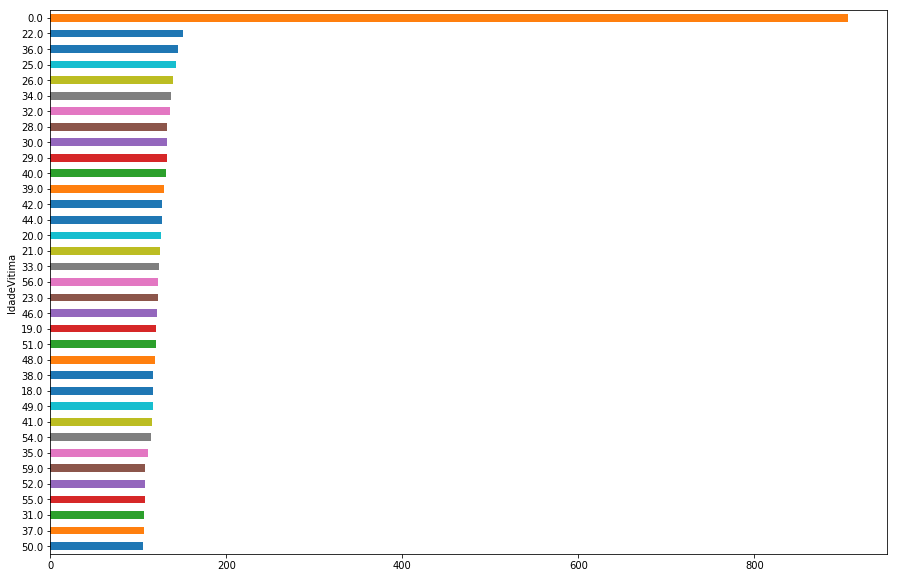

In [211]:
# Testando o groupBy
df.groupby('CausaMortis').size().sort_values().plot(kind='barh')
df.groupby('IdadeVitima').size().sort_values().tail(35).plot(kind='barh', figsize=(15,10))

In [ ]:
# Testando o query
df.query('"CAMPINAS" in NomeDelegaciaOrigem')

In [ ]:
#df.query('"CAMPINAS" in NomeDelegaciaOrigem')['IdadeVitima'].value_counts().head().plot(kind='barh')
#df.query("CausaMortis == 'Trauma'")['IdadeVitima'].value_counts().head().plot(kind='barh')

In [214]:
# Fazendo a pesquisa de elementos com base no nome da vítima
nome = str(input('Nome: '))
for i in range(len(df)):
    if nome.upper() in str(df['NomeVitima'][i]):
        print('____________________________')
        print('Nome: ', df['NomeVitima'][i])
        print('Idade: ', df['IdadeVitima'][i])
        print('Causa da Morte: ', df['CausaMortis'][i])
        print('____________________________')

Nome: Abner
____________________________
Nome:  ABNER ROGERIO DOS SANTOS SANTANA
Idade:  23.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  ABNER BEZERRA
Idade:  19.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  ABNER BRUNO VIANA ALVES
Idade:  22.0
Causa da Morte:  Traumatismo crâniencefálico violento
____________________________


In [215]:
# Imprimindo as vítimas menores de 15 anos
for i in range(len(df)):
    if df['IdadeVitima'][i] <= 15:
        print('____________________________')
        print('Nome: ', df['NomeVitima'][i])
        print('Idade: ', df['IdadeVitima'][i])
        print('Causa da Morte: ', df['CausaMortis'][i])
        print('____________________________')

____________________________
Nome:  HELOIZE DA SILVA
Idade:  1.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  GUILHERME CARVALHO MARTINS
Idade:  12.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  ANDERSON TIAGO DOS SANTOS
Idade:  1.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  HELIO GANDRA DE ANDRADE
Idade:  11.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  MIGUEL VILSON RODRIGUES DE LIVEIRA
Idade:  3.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  SOPHIA SILVA LESSA
Idade:  2.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  LARISSA NUNES MARTINELI
Idade:  8.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  RECEM NASCIDO
Idade:  2.0
Causa da Morte:  nan
____________________________
____________________________

____________________________
Nome:  JOAQUIM HENRIQUE RIBEIRO
Idade:  2.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  GEOVANNI VICTOR DE SOUZA
Idade:  8.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  REBERT RUFINO CRUZ
Idade:  12.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  MATEUS FONSECA DE OLIVEIRA
Idade:  1.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  RAFAEL JUNIOR ROCHA SANTOS
Idade:  1.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  LUIZ FELIPE SILVA DE SOUZA
Idade:  15.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  ALEXSANDRO OLIVEIRA DE LIMA
Idade:  13.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  YAGO MEDRADO
Idade:  2.0
Causa da Morte:  nan
____________________________
______________________

____________________________
____________________________
Nome:  CARLOS ARAUJO DE OLIVEIRA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  CARLOS DANIEL DOS SANTOS
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  CARLOS EDUARDO DOS SANTOS
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  CARLOS EDUARDO RIBEIRO DA SILVA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  CARLOS FERNANDES
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  CÉLIO FRANCISCO DOS SANTOS
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  CELSO AGATELLI
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  CESAR AUGUSTO COLOMBO FERREIRA
Idade:  0.0
Causa da Morte:  nan
_________________

Nome:  ISOLINA BUGLIAME BEGO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  IVAHIR MESSUCA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  IZABEL DOS SANTOS MARCAL
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  IZAURA ANTONIO DA ROCHA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  JACQUES DOUGLAS DOS SANTOS
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  JAIRO CASTILHO SANCHES
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  JANAINA DA SILVA LISBOA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  JEAN RODRIGUES DO NASCIMENTO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  JERONIMO DE OLIVEIRA

Nome:  NATIMORTO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  NATIMORTO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  NATIMORTO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  NATIMORTO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  NATIMORTO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  NATIMORTO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  NATIMORTO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  NATIMORTO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  NATIMORTO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  NEFITALY PEREIRA DA C

____________________________
Nome:  VALENTINA DO SANTOS RAMOS
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  ANTONIO VIEIRA BARBOZA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  EDSON SOARES LIMA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  ATAIDE ALECRIM
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  WESLEY DOS SANTOS ANDRADE
Idade:  4.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  HUMBERTO DO OURO BAHIA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  NM DE CAMILA SILVA DA FONSECA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  MATHEUS FERREIRA DE OLIVEIRA
Idade:  10.0
Causa da Morte:  nan
____________________________
_________________________

____________________________
____________________________
Nome:  MARCOS DOMINGO DE MELO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  RAFAELA FIDALGO VITIELLO
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  ERMESINA TEIXEIRA COSTA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  LUCIANO RODRIGUES PASSOTTI
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  JACKSON MARK DOS SANTOS
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  KELY CRISTINA MARTINS DOS REIS
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  WILSON ANTONIO DE SOUZA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  WELLINGTON HELFER BRAZ DE MACEDO
Idade:  0.0
Causa da Morte:  nan
_____

Causa da Morte:  nan
____________________________
____________________________
Nome:  VERALDINO JOSE DA SILVA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  MARIA LOURDES ALMEIDA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  OSCAR MARCHADO DE AMORIM
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  DOMINGOS ALVES DE MATOS
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  SENHORINHA RODRIGUES DE SOUZA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  LAERCIO FIRMINO MOREIRA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  LUCAS SALES DE SOUSA
Idade:  0.0
Causa da Morte:  nan
____________________________
____________________________
Nome:  DESCONHECIDO
Idade:  0.0
Causa da Morte:  nan
____________

Causa da Morte:  Acidente vascular cerebral hemorrágico
____________________________
____________________________
Nome:  ADOLFO NAVARRO SORROCHE
Idade:  0.0
Causa da Morte:  Acidente vascular cerebral hemorragico
____________________________
____________________________
Nome:  JOSUE DIAS DE OLIVEIRA
Idade:  0.0
Causa da Morte:  Hemorragia aguda interna traumática
____________________________
____________________________
Nome:  NAIR FARIA PACHECO
Idade:  0.0
Causa da Morte:  Acidente vascular cerebral isquêmico.
____________________________
____________________________
Nome:  LEONIDAS RODRIGUES RIBEIRO
Idade:  0.0
Causa da Morte:  Isquemia Miocardica / Edema Pulmonar
____________________________
____________________________
Nome:  ALBERTO APARECIDO LUZ LIMA DOS SANTOS
Idade:  0.0
Causa da Morte:  Asfixia mecânica Constrição cervical
____________________________
____________________________
Nome:  KEVIN ACELINO FLORIANO DE SOUZA
Idade:  0.0
Causa da Morte:  Asfixia mecânica Constrição ce

____________________________
Nome:  TOSHIFICO WANISHI
Idade:  0.0
Causa da Morte:  Traumatismo crâniencefálico
____________________________
____________________________
Nome:  JOAO JOSE SIQUEIRA DA SILVA
Idade:  0.0
Causa da Morte:  Traumatismo crâniencefálico
____________________________
____________________________
Nome:  PATRICK HENRIQUE FERNANDES DA ROCHA
Idade:  13.0
Causa da Morte:  Traumatismo crâniencefálico
____________________________
____________________________
Nome:  MOACIR CASTANHARO
Idade:  0.0
Causa da Morte:  Traumatismo crâniencefálico
____________________________
____________________________
Nome:  ANTENOR JOSE BORGES
Idade:  0.0
Causa da Morte:  Infarto agudo do miocárdio.
____________________________
____________________________
Nome:  SERGIO CASTILLO GARCIA
Idade:  0.0
Causa da Morte:  Infarto agudo do miocárdio.
____________________________
____________________________
Nome:  ANTONIO JOSE DOS SANTOS
Idade:  0.0
Causa da Morte:  Traumatismo crâniencefálico
_______

Idade:  0.0
Causa da Morte:  Miocardiopatia isquêmica
____________________________
____________________________
Nome:  DESCONHECIDO Nº 58/2018
Idade:  0.0
Causa da Morte:  edema pulmonar bilateral
____________________________
____________________________
Nome:  ALVARO JOANES BERNUCCE DOS SANTOS
Idade:  3.0
Causa da Morte:  Trombo embolia pulmonar
____________________________
____________________________
Nome:  FABIO DOS SANTOS GRACINDO
Idade:  0.0
Causa da Morte:  Edema agudo dos pulmões
____________________________
____________________________
Nome:  MARTA ROCHA BAIA
Idade:  0.0
Causa da Morte:  Edema agudo dos pulmões
____________________________
____________________________
Nome:  HERMELINDA JANUARIO
Idade:  0.0
Causa da Morte:  tromboembolia pulmonar.
____________________________
____________________________
Nome:  DILVETE SANTOS NARUTO
Idade:  0.0
Causa da Morte:  Infarto Agudo Miocárdio
____________________________
____________________________
Nome:  SUELI PERERA PINTO DE OLIVEIR

____________________________
____________________________
Nome:  ROSEMI BORTOLONI DROSS
Idade:  0.0
Causa da Morte:  Asfixia mecânica
____________________________
____________________________
Nome:  BEATRIZ SOUZA SILVA
Idade:  15.0
Causa da Morte:  Asfixia mecânica
____________________________
____________________________
Nome:  ANNA CLAUDIA DA SILVA MICHELS
Idade:  0.0
Causa da Morte:  Politraumatismo
____________________________
____________________________
Nome:  ERNANI DE PAIVA
Idade:  0.0
Causa da Morte:  Politraumatismo
____________________________
____________________________
Nome:  APARECIDO DAMASCENO SIMOURA
Idade:  0.0
Causa da Morte:  Politraumatismo
____________________________
____________________________
Nome:  DESCONHECIDO BO: 5559/18 - 03. DP
Idade:  0.0
Causa da Morte:  Politraumatismo
____________________________
____________________________
Nome:  CELY MARGARETH MENDES
Idade:  0.0
Causa da Morte:  Politraumatismo
____________________________
_________________________

In [216]:
def deduplicate_stats(query=None):
    if query:
        df_tmp = df.query(query)
    else:
        df_tmp = df
    total_rows = len(df_tmp)
    unique_rows = len(df_tmp.groupby(['NomeVitima', 'CausaMortis']))
    unique_rows_same_date = len(df_tmp.groupby(['NomeVitima', 'CausaMortis', 'IdadeVitima']))
    reducao_fila = (total_rows - unique_rows) / total_rows
    print('       registros no departamento:', total_rows)
    print('registros únicos na departamento:', unique_rows)
    print('              duplicados (total):', total_rows - unique_rows)
    print('    duplicados (mesmo timestamp):', total_rows - unique_rows_same_date)
    print('        redução com deduplicação:', int(100*reducao_fila), '%')

In [217]:
deduplicate_stats('NomeDelegaciaOrigem == "03 D.P. - CAMPINAS"')
print('________________________________')
deduplicate_stats('NomeDelegaciaOrigem == "01 D.P. - ITU"')
print('________________________________')
deduplicate_stats()

       registros no departamento: 8
registros únicos na departamento: 8
              duplicados (total): 0
    duplicados (mesmo timestamp): 0
        redução com deduplicação: 0 %
________________________________
       registros no departamento: 9
registros únicos na departamento: 9
              duplicados (total): 0
    duplicados (mesmo timestamp): 0
        redução com deduplicação: 0 %
________________________________
       registros no departamento: 9303
registros únicos na departamento: 8702
              duplicados (total): 601
    duplicados (mesmo timestamp): 286
        redução com deduplicação: 6 %


In [218]:
# Verificando a causa da morte
# Como os arquivos de 2013 a 2015 estão sem a causa definida, fica dificil fazer uma análise precisa do gráfico
for i in range(len(df)):
    if str(df['CausaMortis'][i]) != 'nan' and int(df['IdadeVitima'][i]) < 3:
        print(df['IdadeVitima'][i],df['CausaMortis'][i])

0.0 Ante ao exposto, pode-se inferir que foi examinado um corpo em estado de morte real. A morte foi consequência de doença pulmonar obstrutiva crônica agudizada/trombose venosa aguda.
0.0 Septicemia e Coagulação intravascular disseminada, por uma ação patogênico-infecciosa, no curso de um aneurisma dissecante da aorta proximal e hipertensão arterial sistêmica.
0.0 diante do observado e exposto concluo que a pericianda faleceu por broncoaspiração de fumaça e fuligem e asfixia devido a carbonização em vida
1.0 Asfixia mecânica causada por broncoaspiração de líquido gástrico de estase causada por obstrução de íleo distal por intussuscepção intestinal.
0.0 Choque cardiogênico agudo por um Infarto agudo do miocárdio por uma doença arterial coronária e miocardiopatia hipertrófica.
0.0 Choque cardiogênico agudo por um Infarto agudo do miocárdio por uma doença arterial coronária e miocardiopatia dilatada.
1.0 Asfixia mecânica Asfixia Mecânica / Insuficiência Respiratória Aguda / Asfixia Mecân

0.0 CHOQUE HEMORRÁGICO
0.0 Infarto miocárdico
0.0 Hematoma subdural
0.0 Choque Tramático.
0.0 Bronco aspiração.
0.0 Asfixia mecânica
0.0 Broncopneumonia.
0.0 Asfixia mecânica
0.0 Asfixia mecânica
0.0 Asfixia mecânica
0.0 Ruptura de Aorta
0.0 Asfixia mecânica
0.0 ASFIXIA MECÂNICA
0.0 Sufocação direta
0.0 Asfixia mecânica
0.0 Asfixia mecânica
0.0 Asfixia mecânica
0.0 Politraumatismo
0.0 Politraumatismo
0.0 Politraumatismo
0.0 Politraumatismo
0.0 Politraumatismo
0.0 Edema pulmonar.
0.0 Politraumatismo
0.0 Politraumatismo
0.0 broncopneumonia
0.0 Broncoaspiração
0.0 Politraumatismo
0.0 Politraumatismo
0.0 Politraumatismo
0.0 Politraumatismo
0.0 Broncopneumonia
0.0 Politraumatismo
0.0 Politraumatismo
0.0 Anóxia neonatal
0.0 Politraumatismo
0.0 Politraumatismo
0.0 Politraumatismo
0.0 Edema pulmonar
0.0 Edema pulmonar
0.0 Indeterminada.
0.0 Edema pulmonar
0.0 choque spetico
0.0 choque séptico
0.0 indeterminada
0.0 indeterminada
0.0 indeterminada
0.0 indeterminada
1.0 Indeterminada
0.0 INDETERM

In [219]:
# Configurando o ambiente para a análise dos dados
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [228]:
# Criando funções para cria os gráficos e salvá-los na pasta
# Todas as funções funcionam com base em um dicionário com os dados do gráfico
def montarGrafico(dicionarioGraficoMontar, nomeArquivo): # Montar gráfico linhas
    fig, ax = plt.subplots()
    ax.plot(dicionarioGraficoMontar['x'], dicionarioGraficoMontar['y'], color = dicionarioGraficoMontar['corLinha'])
    plt.scatter(dicionarioGraficoMontar['x'], dicionarioGraficoMontar['y'], color = dicionarioGraficoMontar['corPontos'])
    plt.title(dicionarioGraficoMontar['titulo'])
    plt.xlabel(dicionarioGraficoMontar['xLabel'])
    plt.ylabel(dicionarioGraficoMontar['yLabel'])
    plt.savefig('GraficosIML/' + nomeArquivo + '.png')
    plt.show()

def montarGraficoComentar(dicionarioGraficoMontar, intervalo, xytxt, comentario, nomeArquivo): # Gráfico de barras
    fig, ax = plt.subplots()
    ax.bar(dicionarioGraficoMontar['x'], dicionarioGraficoMontar['y'])
    ax.annotate(
        comentario,
        xy = intervalo,
        xycoords = 'data',
        xytext = xytxt,
        textcoords = 'data',
        arrowprops = dict(arrowstyle = "->", connectionstyle = "arc3")
    )
    plt.title(dicionarioGraficoMontar['titulo'])
    plt.xlabel(dicionarioGraficoMontar['xLabel'])
    plt.ylabel(dicionarioGraficoMontar['yLabel'])
    plt.savefig('GraficosIML/' + nomeArquivo + '.png')
    plt.show()

def montarPizza(dicionarioGraficoMontar, nomeArquivo): # Gráfico pizza
    plt.axis('equal')
    plt.pie(
        dicionarioGraficoMontar['y'],
        labels = dicionarioGraficoMontar['x'],
        autopct = '%1.1f%%'
    )
    plt.title(dicionarioGraficoMontar['titulo'])
    plt.savefig('GraficosIML/' + nomeArquivo + '.png')
    plt.show()

def getMaiorvalorY(dicionarioGraficoMontar): # efine o maior elemento do eixo y do gráfico
    maximoY = (-1) * math.inf
    for indice in range(len(dicionarioGraficoMontar['y'])):
        if dicionarioGraficoMontar['y'][indice] > maximoY:
            maximoY = dicionarioGraficoMontar['y'][indice]
            x = dicionarioGraficoMontar['x'][indice]
    return [x, maximoY]

In [229]:
# Definindo os eixos X e Y sem restrição apenas pegando a quantidade de óbitos por ano 2013 - 2018
eixos = {'AnoLaudo':indice,'QuantidadeObitos':[]}
for tabela in dados:
    eixos['QuantidadeObitos'].append(len(tabela['DeclaracaoObito']))

In [230]:
# Formatando os dados do gráfico
dicionarioGrafico = {
    'x' : eixos['AnoLaudo'], 
    'y' : eixos['QuantidadeObitos'],
    'corPontos' : 'black',
    'corLinha' : 'black',
    'titulo' : 'Óbitos Registrados no Estado de São Paulo',
    'xLabel' : 'Ano',
    'yLabel' : 'Quantidade de Óbitos'
}
# Definindo o maior elemento
maiorElemento = getMaiorvalorY(dicionarioGrafico)
descrição = (
    'O ano com mais óbitos registrados\nsem restrição de idade é o ano de ' + 
    str(maiorElemento[0]) + 
    ' com ' + 
    str(maiorElemento[1]) +
    ' óbitos registrados. '
)
# Colocando uma descrição
dicionarioGrafico['xLabel'] += (
    '\n\n' + 
    descrição + 
    '\n\n' +
    'Brasil tem índice recorde de 1,6 milhão de casos de dengue em 2015' + '\n'
    'http://g1.globo.com/bemestar/noticia/2016/01/pais-teve-16-milhao-de-casos-de-dengue-em-2015.html'
)

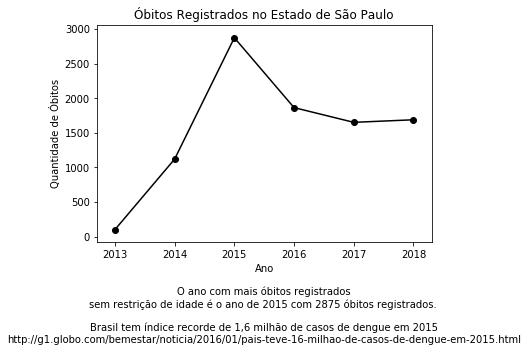

In [234]:
# Montando o gráfico e salvando em um arquivo png
montarGrafico(dicionarioGrafico, 'Registro Obito Sem Restricao')

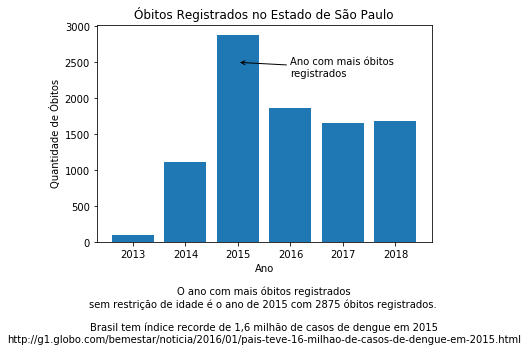

In [235]:
# Montando um gráfico com comentário e salvando em um arquivo png
montarGraficoComentar(
    dicionarioGrafico,
    (2015, 2500), (2016, 2300), 
    "Ano com mais óbitos\nregistrados", 
    'Registro Obito Sem Restricao Barra'
)

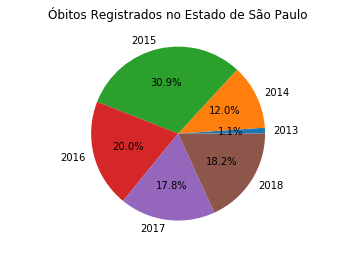

In [236]:
# Montando um gráfico pizza
montarPizza(dicionarioGrafico, 'Registro Obito Sem Restricao Pizza')

In [237]:
# Definido os eixos X e Y com base na idade abaixo de 15 anos
eixos = {'AnoLaudo':indice,'QuantidadeObitos':[]}
for tabela in dados:
    quant = 0
    for idade in tabela['IdadeVitima']:
        if idade <= 15:
            quant = quant + 1
    eixos['QuantidadeObitos'].append(quant)

In [241]:
# Formatando os dados do gráfico
dicionarioGraficoIdade = {
    'x' : eixos['AnoLaudo'], 
    'y' : eixos['QuantidadeObitos'],
    'corPontos' : 'black',
    'corLinha' : 'black',
    'titulo' : 'Óbitos no estado de São Paulo com menores de 15 anos',
    'xLabel' : 'Ano',
    'yLabel' : 'Quantidade de Óbitos'
}
# Definido o maior elemento e adicionando uma descrição
maiorElemento = getMaiorvalorY(dicionarioGraficoIdade)
descrição = (
    'O ano com mais óbitos registrados com\nmenores de 15 anos é o ano de ' + 
    str(maiorElemento[0]) + 
    ' com ' + 
    str(maiorElemento[1]) +
    ' óbitos registrados. '
)
dicionarioGraficoIdade['xLabel'] += (
    '\n\n' + 
    descrição + 
    '\n\n' +
    'Criminalidade aumenta 8% em 2016' + '\n' +
    'https://expressodasilhas.cv/pais/2016/09/10/criminalidade-aumenta-8-em-2016/50113'
)

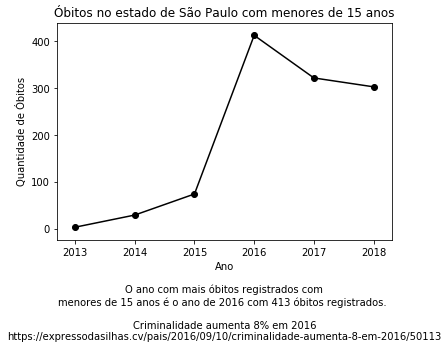

In [242]:
# Montando o gráfico
montarGrafico(dicionarioGraficoIdade, 'Registro Obito Adolescentes e Menores')

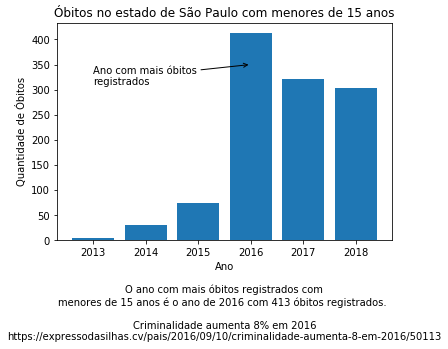

In [243]:
# Montando o gráfico de barras com a idade e um comnetário
montarGraficoComentar(
    dicionarioGraficoIdade, 
    (2016, 350), (2013, 310), 
    "Ano com mais óbitos\nregistrados",
    'Registro Obito Adolescentes e Menores Barra'
)

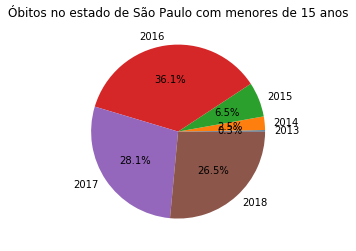

In [244]:
# Montando o gráfico pizza com menores de 15 anos
montarPizza(dicionarioGraficoIdade, 'Registro Obito Adolescentes e Menores Pizza')

In [245]:
# Definindo os eixos X e Y de acordo com a idade porém pegando crianças de 0 a 3 anos
eixos = {'AnoLaudo':indice,'QuantidadeObitos':[]}
for tabela in dados:
    quant = 0
    for idade in tabela['IdadeVitima']:
        if idade < 3:
            quant = quant + 1
    eixos['QuantidadeObitos'].append(quant)

In [248]:
# Formatando os dados do gráfico
dicionarioGraficoBebes = {
    'x' : eixos['AnoLaudo'],
    'y' : eixos['QuantidadeObitos'],
    'corPontos' : 'black',
    'corLinha' : 'black',
    'titulo' : 'Óbitos no estado de São Paulo com bebês menores de 3 anos',
    'xLabel' : 'Ano',
    'yLabel' : 'Quantidade de Óbitos'
}
# Definindo o maior elemento
maiorElemento = getMaiorvalorY(dicionarioGraficoIdade)
descrição = (
    'O ano com mais óbitos registrados com\nmenores de 15 anos é o ano de ' + 
    str(maiorElemento[0]) + 
    ' com ' + 
    str(maiorElemento[1]) +
    ' óbitos registrados.'
)
dicionarioGraficoBebes['xLabel'] += (
    '\n\n' + 
    descrição + 
    '\n\n' +
    'SUS perde 23 mil leitos hospitalares em 5 anos, diz Conselho de Medicina' + '\n' +
    'https://www1.folha.uol.com.br/cotidiano/2016/05/1772077-sus-perde-23-mil-leitos-hospitalares-em-5-anos-diz-conselho-de-medicina.shtml'
)

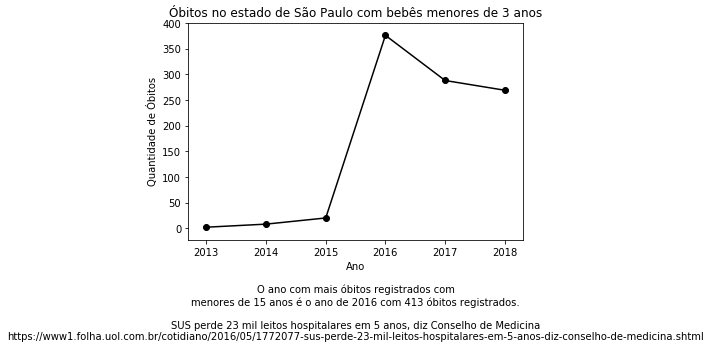

In [249]:
# Montando o gráfico
montarGrafico(dicionarioGraficoBebes, 'Registro Obito Bebes menores de 3 anos')

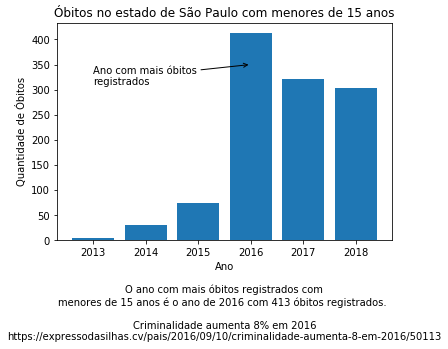

In [250]:
# Montando o gráfico de barras com comentário
montarGraficoComentar(
    dicionarioGraficoIdade,
    (2016, 350), (2013, 310),
    "Ano com mais óbitos\nregistrados",
    'Registro Obito Bebes menores de 3 anos Barra'
)

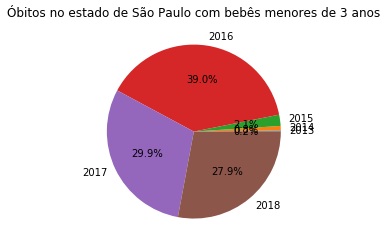

In [251]:
# Montando um gráfico estilo pizza
montarPizza(dicionarioGraficoBebes, 'Registro Obito Bebes menores de 3 anos Pizza')

In [252]:
# Defindo a relação para o gráfico pizza com a causa da morte e a quantidade de óbitos registrados
eixos = {
    'CausaMortis':['Traumatismo', 'Asfixia', 'Anemia', 'Pneumonia', 'Indeterminada'],
    'QuantidadeObitos':[0,0,0,0,0]
}
for causa in df['CausaMortis']:
    causa = str(causa).lower()
    for indice in range(len(eixos['CausaMortis'])):
        if eixos['CausaMortis'][indice].lower() in causa:
            eixos['QuantidadeObitos'][indice] += 1

In [253]:
# Formatando os dados do gráfico
dicionarioGraficoCausa = {
    'x' : eixos['CausaMortis'],
    'y' : eixos['QuantidadeObitos'],
    'corPontos' : 'black',
    'corLinha' : 'black',
    'titulo' : 'Óbitos no estado de São Paulo\nde acordo com a causa da morte',
    'xLabel' : 'Ano',
    'yLabel' : 'Quantidade de Óbitos'
}
# Definindo o maior elemento do eixo y do gráfico
maiorElemento = getMaiorvalorY(dicionarioGraficoCausa)
descrição = (
    'A maior causa de morte em São Paulo é ' + 
    str(maiorElemento[0]) + '\n' +
    ' com ' + 
    str(maiorElemento[1]) +
    ' óbitos registrados.'
)
dicionarioGraficoCausa['titulo'] += '\n\n' + descrição

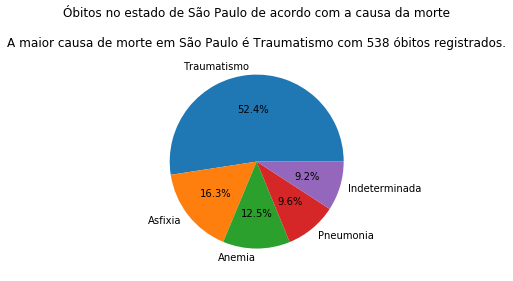

In [254]:
# Montando o gráfico final pizza e salvando em um arquivo png
montarPizza(dicionarioGraficoCausa, 'Grafico Pizza Causa da Morte')